In [1]:
# Install libraries (if not already installed)
!pip install pandas scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example model
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load your dataset
df = pd.read_csv('C:/Users/chiri/Downloads/sales_data.csv')
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


Model Evaluation:
Mean Absolute Error (MAE): 2745.54
Mean Squared Error (MSE): 9591308.89
R-squared (R2): -0.04


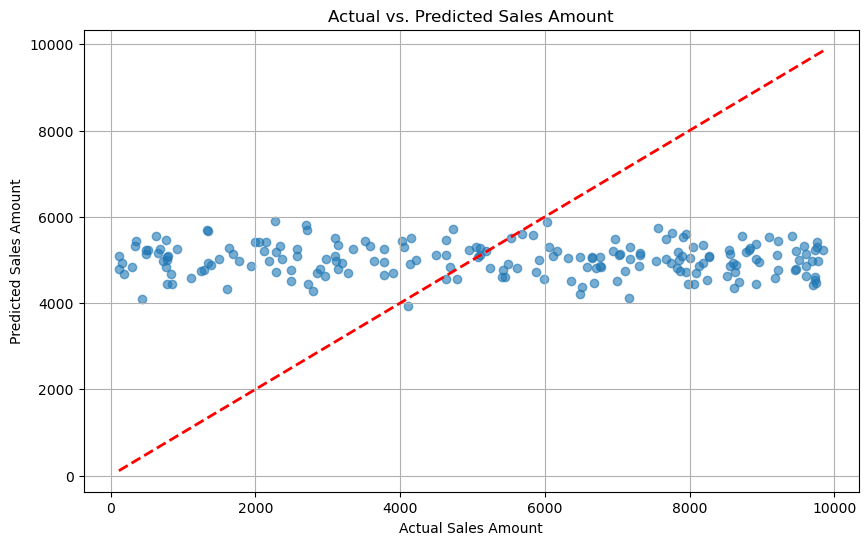

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Preprocessing Steps ---
# 1. Load the original dataset
df = pd.read_csv('C:/Users/chiri/Downloads/sales_data.csv')

# 2. Drop redundant and unnecessary columns
df = df.drop(columns=['Region_and_Sales_Rep'])

# 3. Convert 'Sale_Date' to a datetime object and create new features
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Sale_Month'] = df['Sale_Date'].dt.month
df['Sale_Day'] = df['Sale_Date'].dt.dayofweek
df = df.drop(columns=['Sale_Date']) # Correctly drop the original column

# 4. Perform one-hot encoding on categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Separate features (X) and target (y)
X = df_processed.drop(columns=['Sales_Amount'])
y = df_processed['Sales_Amount']

# --- Model Training and Evaluation Steps ---
# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Make predictions and evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs. Predicted Sales Amount')
plt.grid(True)
plt.show()